# Importando as Bibliotecas utilizadas no projeto 

In [85]:
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt

# Auto remove do projeto

In [50]:
os.remove('acervocursos.db')if os.path.exists('acervocursos.db') else None

# Criando a conexão com o banco de dados

In [51]:
conexao = sqlite3.connect('acervocursos.db')

# Criando o cursor para percorrer as linhas com o banco de dados

In [52]:
cur = conexao.cursor()

# Criando a função para criar tabela de cursos

In [53]:
def create_table():
    cur.execute('create table cursos (id integer primary key not null, nome varchar(20), categoria varchar(20), professor varchar(20), valor real)')

# Criando a função de inserir registros na tabela de cursos

In [54]:
def sql_insert():
    novo_nome = input('Nome: ')
    nova_categoria = input('Categoria: ')
    novo_professores = input('Professor: ')
    novo_valor = float(input('Valor: '))
    cur.execute('insert into cursos(nome, categoria, professor, valor) values (?,?,?,?)',(novo_nome, nova_categoria, novo_professores, novo_valor))
    conexao.commit()

# Executando a função de criar tabela

In [55]:
create_table()

# Executando a função de inserir dados e cadastrando cursos na tela

In [56]:
for r in range(7):
    sql_insert()
    

Nome: Java
Categoria: Programação
Professor: Gustavo Guanabara
Valor: 90
Nome: MySQL
Categoria: Banco de Dados
Professor: Guilherme Silveira
Valor: 120
Nome: Linux Avançado
Categoria: Sistema Operacional
Professor: Marcos Silva
Valor: 200
Nome: Excel Avançado
Categoria: Pacote Office
Professor: Alon
Valor: 50
Nome: Python
Categoria: Programação
Professor: Lira
Valor: 130
Nome: Wordpress
Categoria: Web
Professor: Alfredo
Valor: 100
Nome: Cabeamentos
Categoria: Rede de Computadores
Professor: Alfredo
Valor: 80


# Convertendo a tabela cursos para um DataFrame e modificando o nome da coluna

In [121]:
cursos_df = pd.read_sql('Select * from cursos', conexao)
cursos_df = cursos_df.rename(columns={'id': 'id_curso'})

# Exibindo a tabela cursos na tela

In [124]:
cursos_df

,id_curso,nome,categoria,professor,valor
0,1,Java,Programação,Gustavo Guanabara,90.0
1,2,MySQL,Banco de Dados,Guilherme Silveira,120.0
2,3,Linux Avançado,Sistema Operacional,Marcos Silva,200.0
3,4,Excel Avançado,Pacote Office,Alon,50.0
4,5,Python,Programação,Lira,130.0
5,6,Wordpress,Web,Alfredo,100.0
6,7,Cabeamentos,Rede de Computadores,Alfredo,80.0


# Modificando o index da tabela 

In [125]:
cursos_df = cursos_df.set_index('id_curso')
cursos_df

,nome,categoria,professor,valor
id_curso,,,,
1,Java,Programação,Gustavo Guanabara,90.0
2,MySQL,Banco de Dados,Guilherme Silveira,120.0
3,Linux Avançado,Sistema Operacional,Marcos Silva,200.0
4,Excel Avançado,Pacote Office,Alon,50.0
5,Python,Programação,Lira,130.0
6,Wordpress,Web,Alfredo,100.0
7,Cabeamentos,Rede de Computadores,Alfredo,80.0


# Criando um gráfico com os valores de cada curso

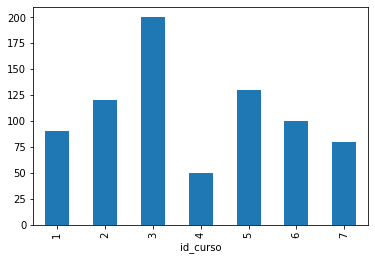

In [126]:
grafico = cursos_df['valor'].plot(kind='bar')


